# HAND DIGIT RECOGNITION

In [160]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [161]:
! pwd

/kaggle/working


## Using famous MNIST Dataset****

In [162]:
from keras.datasets import mnist

In [163]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [164]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


## Opening a random image

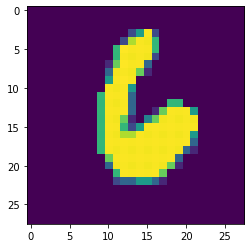

In [165]:
from matplotlib import pyplot as plt
plt.imshow(x_train[11000])
plt.show()

The number shown was 6

## Changing the shape of the data to (X,Y,1) ie., Gray Scale Images

In [166]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

## One-Hot Encode our target column

In [167]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [168]:
from keras.utils import np_utils
y_train  = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [169]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Create the Model

In [170]:
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.optimizers import SGD
from keras.models import Sequential

In [171]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),
                activation='relu',
                input_shape = (28,28,1)))
model.add(Conv2D(64,kernel_size=(3,3),
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer=SGD(0.01),
             metrics=['accuracy'])
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)             

## Training

In [172]:
batch_size=32
epochs=10
history = model.fit(x_train,y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   verbose=1,
                   validation_data = (x_test,y_test))
score = model.evaluate(x_test,y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

Epoch 1/10
1875/1875 [==============================] - 98s 52ms/step - loss: 2.3006 - accuracy: 0.5996 - val_loss: 0.4046 - val_accuracy: 0.8827
Epoch 2/10
1875/1875 [==============================] - 96s 51ms/step - loss: 0.5564 - accuracy: 0.8261 - val_loss: 0.2645 - val_accuracy: 0.9182
Epoch 3/10
1875/1875 [==============================] - 98s 52ms/step - loss: 0.4113 - accuracy: 0.8759 - val_loss: 0.2137 - val_accuracy: 0.9355
Epoch 4/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.3468 - accuracy: 0.8934 - val_loss: 0.1807 - val_accuracy: 0.9430
Epoch 5/10
1875/1875 [==============================] - 96s 51ms/step - loss: 0.3091 - accuracy: 0.9065 - val_loss: 0.1675 - val_accuracy: 0.9497
Epoch 6/10
1875/1875 [==============================] - 97s 52ms/step - loss: 0.2868 - accuracy: 0.9130 - val_loss: 0.1552 - val_accuracy: 0.9526
Epoch 7/10
1875/1875 [==============================] - 96s 51ms/step - loss: 0.2723 - accuracy: 0.9172 - val_loss: 0.1479 

In [175]:
hist_dict = history.history

## plotting loss & accuracy

Text(0, 0.5, 'loss')

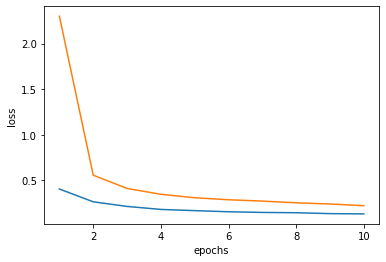

In [178]:
from matplotlib import pyplot as plt

plt.plot(range(1,epochs+1),hist_dict['val_loss'])
plt.plot(range(1,epochs+1),hist_dict['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')